# K-Means Clustering Demo (rice_ml)

This notebook demonstrates how to use `rice_ml` to:
1. Generate a synthetic dataset
2. (Optional) Reduce dimensionality with PCA
3. Fit K-Means
4. Visualize clusters
5. Evaluate clustering quality (inertia)

**How to run**
- From the repo root: `pip install -e .`
- Then run all cells top-to-bottom.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rice_ml.unsupervised_learning.k_means_clustering import KMeans
from rice_ml.unsupervised_learning.pca import PCA


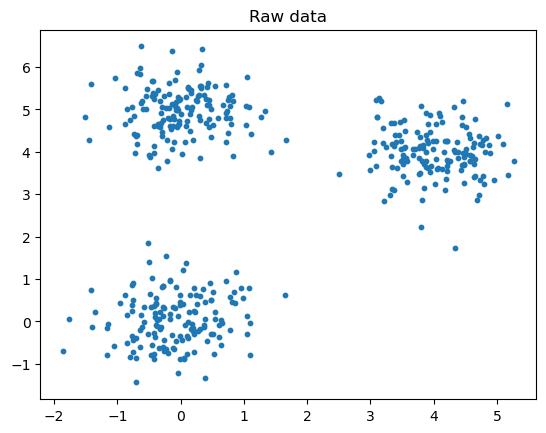

In [2]:
rng = np.random.default_rng(0)

# three blobs in 2D
X1 = rng.normal(loc=(0, 0), scale=0.6, size=(150, 2))
X2 = rng.normal(loc=(4, 4), scale=0.6, size=(150, 2))
X3 = rng.normal(loc=(0, 5), scale=0.6, size=(150, 2))
X = np.vstack([X1, X2, X3])

plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Raw data")
plt.show()


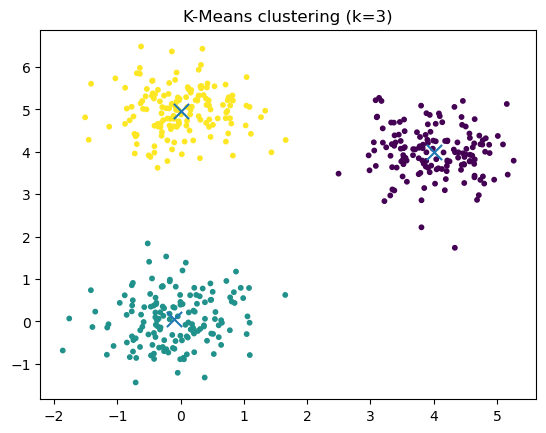

Inertia: 303.07123279690086


In [3]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_  # or kmeans.predict(X) if that's how you wrote it
centers = kmeans.cluster_centers_

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.scatter(centers[:, 0], centers[:, 1], s=120, marker="x")
plt.title("K-Means clustering (k=3)")
plt.show()

print("Inertia:", getattr(kmeans, "inertia_", None))


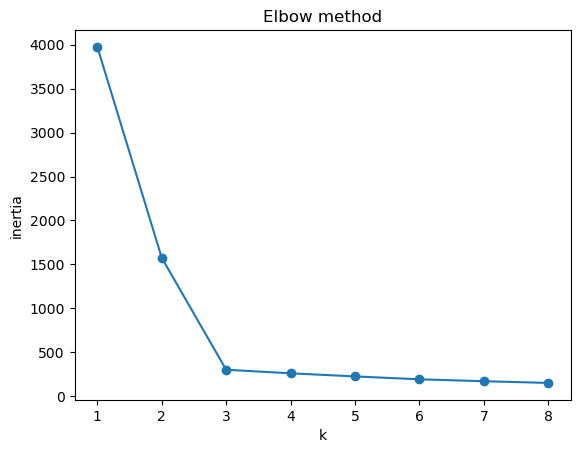

In [4]:
ks = range(1, 9)
inertias = []

for k in ks:
    m = KMeans(n_clusters=k, random_state=0).fit(X)
    inertias.append(m.inertia_)

plt.figure()
plt.plot(list(ks), inertias, marker="o")
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("Elbow method")
plt.show()
